In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Loading Dataset

In [13]:
#Loading the iris dataset from provided source
iris_df = pd.read_csv("../Datasets/Iris.csv", index_col=False)
iris_df = iris_df[iris_df.columns[1:]]

In [14]:
#Creating dataframe for the iris dataset
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


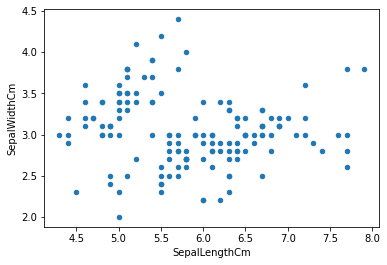

In [15]:
#Visualizing the graph for the dataset (For first two columns)
iris_df.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")
plt.show()

# Computing Optimal K-Clusters:
Before we apply the clustering process on the provided dataset, it is first required to know the optimal number of clusters we should use to perform the task. For that we have different approaches we can use.

### Using the Elbow Method:
The "Elbow Method" is the most commonly used method for the computation of optimal number of clusters. In this method, we will perform the computation of the distance between the centroid and the data points for each different value of k in a aparticular range. The results are then squared and summed up and visualized. The number of clusters 'k' where the value of the obtained sum of squared distances (WCSS) does not change much, that value of k as taken as the optimal number of clusters.

In [16]:
#Selecting features to compute k clusters
X = iris_df.iloc[:, [0, 1, 2, 3]]

In [17]:
#Computing WCSS for the k-values
WCSS = []

for i in range(1,11):
    #Computing k-means for different values of k clusters on the feature vectors
    k_means = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    k_means.fit(X)
    
    #Computing the WCSS value for the computed k-Means
    WCSS.append(k_means.inertia_)

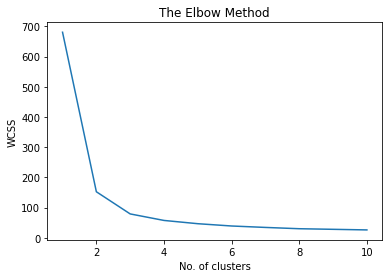

In [18]:
#Visualizing the Elbow Curve to find optimal number of k clusters
plt.plot(range(1,11), WCSS)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

We observe that in the plotted graph, the value of elbow curve does not change much after 3 clusters, thus, we conclude that there are 3 optimal clusters needed for this task.

### Using the Silhouette Coefficient (Score):
The Silhouette Coefficient/Score is yet another way for finding the optimal number of clusters. It uses the mean-intra cluster and mean-nearest-cluster distance for each sample to find out whether the sample is a part of the nearest cluster or not. 

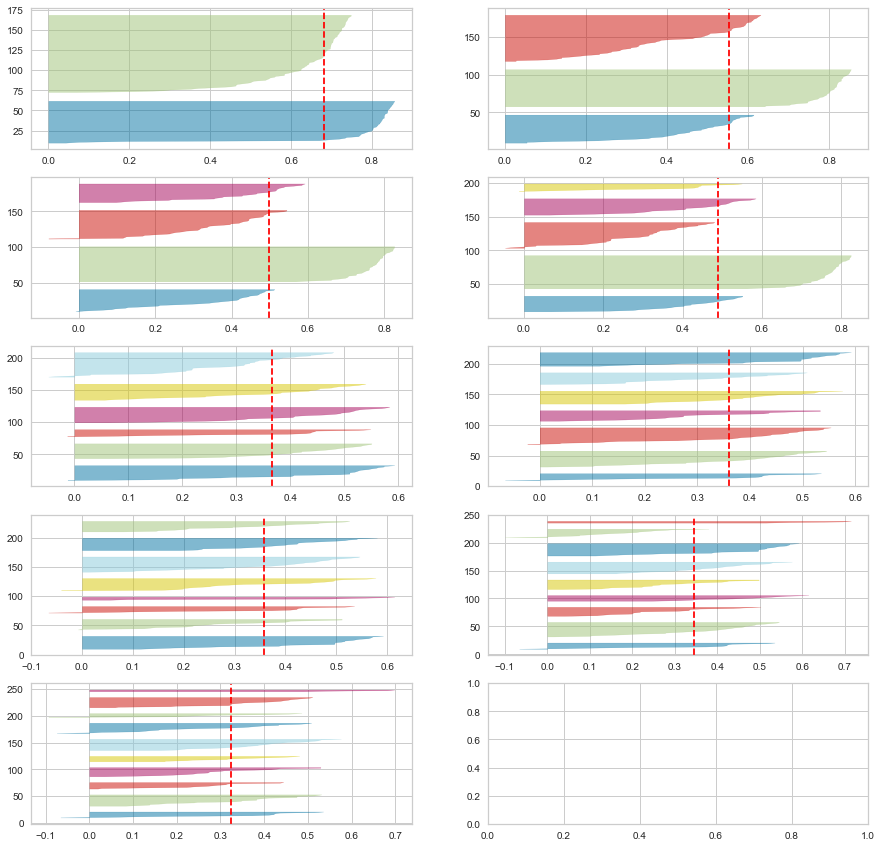

In [19]:
#Using YellowBrick's API to visualize the Silhoutte Scores for different clusters
from yellowbrick.cluster import SilhouetteVisualizer

#Creating subplots for each cluster 
fig, ax = plt.subplots(5, 2, figsize=(15,15))

for i in range(2,11):
    #Computing k-means for different values of k clusters
    k_means = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    
    #Allocating subplot locations
    q, mod = divmod(i, 2)
    
    #Creating silhouette visualizer
    visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

From the visualized Silhouette Scores, we can see that the Silhouette Score for each of the clusters in case of k = 2, 3 is greater than the average Silhouette Score, making these two optimal. Even out of these two, the case of k = 3 contains clusters with uniform size i.e. their size are uniform in thickness as compared to the case of k = 2 clusters. Hence, we conclude that k = 3 are the optimal number of clusters for this case.

# Applying K-Means Clustering with Optimal Clusters:
Now that we have computed the optimal number of clusters, we will apply the K-Means alogirthm with this optimal number i.e. k = 3 to visualize the clustering of the dataset

In [20]:
#Creating KMeans instance for k = 3 
k_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [21]:
#Fitting and Prediciting using the created K_means Instance
labels = k_means.fit_predict(X)

In [22]:
#Getting unique label values
unique_labels = np.unique(labels)
unique_labels

array([0, 1, 2])

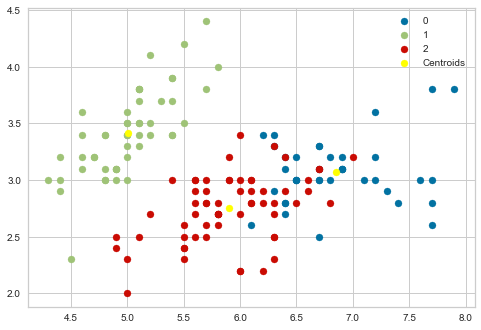

In [23]:
# Visualising the clusters - On the first two columns
for i in unique_labels:
    plt.scatter(iris_df[labels == i].iloc[:, 0] , iris_df[labels == i].iloc[:, 1], label = i)

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], color = 'yellow', label = 'Centroids')

plt.legend()
plt.show()